<font size="+3" color=blue><b> <center><u> Invasive Ductal Carcinoma Classification </u></center></b></font>

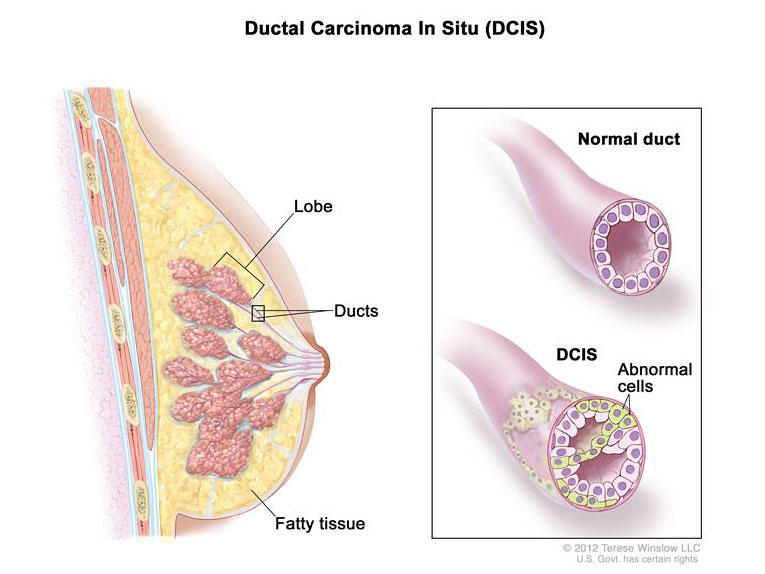

# Objective
Goal of this kernel is following:
- Learn how to implement FastAI on image data.
- Learn how to implement CNN on custom data.
- Learn how to Resnet to get better accuracy.
- Provide Perfect Guide for all the tips and trick to implement CNN and get better accuracy as a Beginner.

I have learned them from [FastAI](https://docs.fast.ai/)

<font size="+1" color=red ><b>Please Upvote my kernel and keep it in your favourite section if you think it is helpful.</b></font>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is Invasive Ductal Carcinoma ?](#31)    
* [2. What is CNN ?](#2)
* [3. What is Transfer Learning ?](#3)    

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#4)
* [2. Import Libraries ](#5)
    
<font color="blue" size=+1><b> Load and view your data </b></font>
* [1. Setting up path for training data ](#6)
* [2. Data Loading For training ](#7)
* [3. Data Explorations ](#8)
* [4. Print Classes present in the data ](#9)

<font color="blue" size=+1><b> Create and train a model </b></font>
* [1. Create Models ](#10)
* [2. Train Model ](#11)
* [3. Finding LR ](#12)
* [4. Finetuning HyperParameter](#13)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#14)
* [2. Prediction Using Trained Model](#15)
* [3. Save and Load Model](#16)
* [4. Sources](#17)

<a id="1"></a>
<font color="blue" size=+2.5><b>Introduction</b></font>


<a id="31"></a>
<font color="blue" size=+2.5><b>1.1  What is Invasive Ductal Carcinoma ?</b></font>
<br/>
<br/>
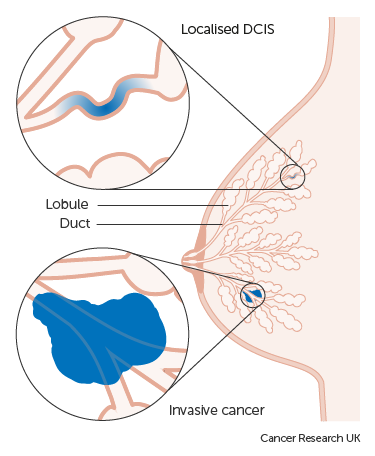
**Ductal carcinoma is a common type of breast cancer that starts in cells that line the milk ducts, which carry breast milk to the nipple. There are two types: Invasive ductal carcinoma (IDC) Ductal carcinoma in situ (DCIS), also called intraductal carcinoma.**

<a id="2"></a>
<font color="blue" size=+2.5><b>1.2  What is CNN ?</b></font>
<br/>
<br/>
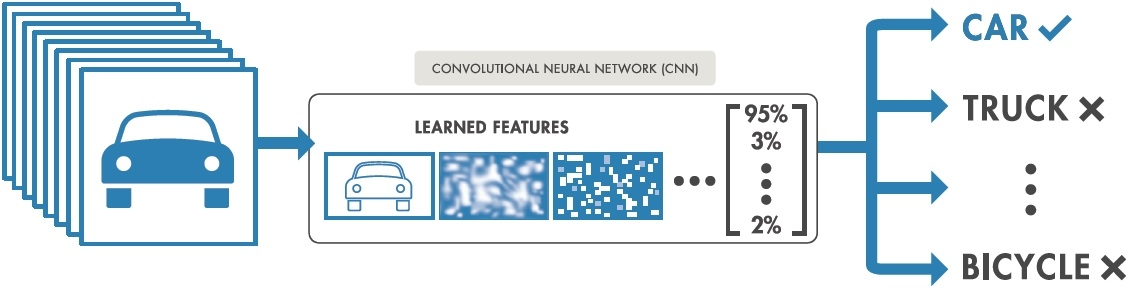
**CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.**

<a id="3"></a>
<font color="blue" size=+2.5><b>1.3  What is Transfer Learning ?</b></font>
<br/>
<br/>
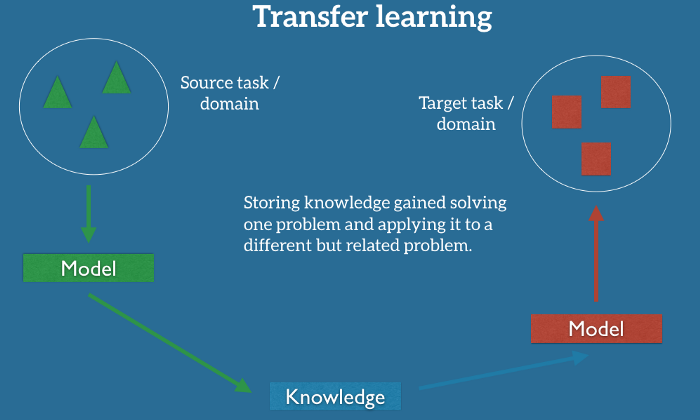

<br/>

**Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.**

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

<a id="5"></a>


<font color="blue" size=+2.5><b>2. Library</b></font>

<a id="4"></a>
<font color="blue" size=+2.5><b>2.1 Installation</b></font>
* Numpy
* Pandas
* Matplotlib
* Fastai

<a id="5"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

<a id="6"></a>
<font color="blue" size=+2.5><b>3.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [ ]:
x  = "/kaggle/input/breast-histopathology-images"
path = Path(x)
pattern= r'([^/_]+).png$'
fnames=get_files(path, recurse=True)
tfms=get_transforms(flip_vert=True, max_warp=0., max_zoom=0., max_rotate=0.)
path.ls()

<a id="7"></a>
<font color="blue" size=+2.5><b>3.2 Data Loading For training</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in my case)
* Test data can also be added but it's optional

In [ ]:
np.random.seed(40)
data = ImageDataBunch.from_name_re(path, fnames, pattern, ds_tfms=tfms, size=50, bs=64,num_workers=4
                                  ).normalize()

<a id="8"></a>
<font color="blue" size=+2.5><b>3.3 Data Explorations</b></font>
<br/>

*Our image dataset is stored as .jpg files in 2 different folders, with each folder bearing the name of model of the images contained in the folder. We use the ImageDataBunch.from_folder() function to load the images and assign labels the images based on the name of the folder they’re read from.*

In [ ]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)


<a id="9"></a>
<font color="blue" size=+2.5><b>3.4 Print Classes present in the data</b></font>
<br/>

* data.c — How many classes are there in our dataset?
* len(data.train_ds) — What is the size of our training dataset?
* len(data.valid_ds) — What is the size of our validation dataset?

In [ ]:
print(data.classes)
len(data.classes)
data.c

In [ ]:
data

<a id="10"></a>
<font color="blue" size=+2.5><b>4.1 Create Model</b></font>
<br/>
* We now use a pre-trained ResNet18 Convolutional Neural Net model, and use transfer learning to learn weights of only the last layer of the network.
* Why Transfer learning? Because with transfer learning, you begin with an existing (trained) neural network used for image recognition — and then tweak it a bit (or more) here and there to train a model for your particular use case. And why do we do that? Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images.
* In our case, we have approximately 4000+ images in our training set — you have one guess to decide if that would have been enough if were to train a neural net from scratch.
* We use the create_cnn() function for loading a pre-trained ResNet18 network, that was trained on around a million images from the ImageNet database.

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

<a id="11"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

<a id="12"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(1,slice(lr1,lr2))

In [ ]:
# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(1,slice(lr))

<a id="13"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>
<br/>

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1,slice(1e-4,1e-3))

In [ ]:
learn.recorder.plot_losses()


<a id="14"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>
<br/>

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

<a id="16"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>
<br/>


In [ ]:
learn.export()
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

<a id="17"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
<br/>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a id="18"></a>
<font color="blue" size=+2.5><b>Feedback and Support</b></font>
<br/>
* Your feedback is much appreciated
* Please UPVOTE if you LIKE this notebook
* Comment if you have any doubts or you found any errors in the notebook